In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# random dataset

## Checkpoints averages and eoc regression

In [76]:
random_checkpoints_df = pd.read_csv('checkpoints.csv')
random_checkpoints_df.head(20)

,book,release,institution_id,class_id,student_id,response,construct,chapter_number,EOC,n_possible,n_correct,n_attempt
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,10,NaN,NaN,NaN,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,11,NaN,NaN,NaN,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,12,NaN,NaN,NaN,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,4.0,Cost,2,0.611765,85.0,52.0,131.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,4.0,Cost,3,0.688679,106.0,73.0,149.0
5,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,4,NaN,NaN,NaN,NaN
6,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,1.0,Cost,5,0.765625,64.0,49.0,92.0
7,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,6,0.757895,95.0,72.0,125.0
8,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,NaN,Cost,7,NaN,NaN,NaN,NaN
9,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,988aaef5-55d8-4efd-a2aa-8a17e687965e,2.0,Cost,8,0.463768,69.0,32.0,82.0


In [77]:
# get unique construct values
constructs = random_checkpoints_df['construct'].unique()
constructs

array(['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value', nan],
      dtype=object)

In [78]:
# make a dataframe with each student's id and their averages for each construct type
# drop na rows
student_averages = random_checkpoints_df.dropna(subset=['construct', 'response'])

# Group by 'student_id' and 'construct' and then calculate the mean of 'response'
student_averages = student_averages.groupby(['student_id', 'construct'])['response'].mean().unstack()

# Reset index to convert the MultiIndex to columns, this makes 'student_id' a column again
student_averages.reset_index(inplace=True)

# Show the resulting DataFrame with each student's id and their averages for each construct type
student_averages.head(10)


construct,student_id,Cost,Expectancy,Intrinsic Value,Utility Value
0,03fefe56-a52f-49fe-9cd8-b183e9badc58,5.818182,3.909091,4.545455,4.636364
1,0556b794-cd80-4af6-8cfa-8055462c215a,2.363636,4.818182,5.454545,5.272727
2,062f021e-8297-41e6-a8fe-54a382ab7404,5.272727,2.363636,2.909091,3.636364
3,073c1155-c6f1-451a-b22d-3508d041dce3,3.000000,4.250000,4.250000,4.000000
4,0790387e-e285-442d-b660-a004d0a5a16f,2.090909,4.363636,4.500000,4.363636
5,0b20a3fe-7868-4115-ad82-eabccdd805c5,3.454545,4.727273,5.000000,5.000000
6,0d6a321b-90fe-4ff3-9a3d-95b56745e231,2.750000,3.666667,4.000000,4.250000
7,0d8dff90-f271-49ee-8e0e-cf7e83c7de61,2.090909,5.090909,4.875000,5.181818
8,0f109cdd-f04e-4799-9a83-39ccebf8b171,1.090909,5.909091,5.909091,5.818182
9,0f122889-830d-40c1-a6f8-f432cb327190,2.272727,4.363636,3.818182,4.090909


In [79]:
# Add average eoc for each student
# Group by 'student_id' and calculate the mean of 'EOC' (End Of Chapter assessment?)
eoc_averages = random_checkpoints_df.groupby('student_id')['EOC'].mean()

# Merge this average EOC with the averages_df dataframe
averages_with_eoc_df = student_averages.merge(eoc_averages, on='student_id')

# add constant
averages_with_eoc_df = sm.add_constant(averages_with_eoc_df)

# Show the resulting DataFrame with the average EOC included
averages_with_eoc_df.head()


,const,student_id,Cost,Expectancy,Intrinsic Value,Utility Value,EOC
0,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,5.818182,3.909091,4.545455,4.636364,0.660306
1,1.0,0556b794-cd80-4af6-8cfa-8055462c215a,2.363636,4.818182,5.454545,5.272727,0.744461
2,1.0,062f021e-8297-41e6-a8fe-54a382ab7404,5.272727,2.363636,2.909091,3.636364,0.726506
3,1.0,073c1155-c6f1-451a-b22d-3508d041dce3,3.000000,4.250000,4.250000,4.000000,0.492354
4,1.0,0790387e-e285-442d-b660-a004d0a5a16f,2.090909,4.363636,4.500000,4.363636,0.703392


In [80]:
indep_vars = ['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']
dep_var = averages_with_eoc_df['EOC']

# Check for NaN or inf values in the independent variables
indep_vars_df = averages_with_eoc_df[indep_vars]
if not np.isfinite(indep_vars_df).all().all():
    # Handle inf or NaN values here. For now, let's drop them.
    indep_vars_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    indep_vars_df.dropna(inplace=True)

# Also, check and handle the dependent variable
dep_var_series = averages_with_eoc_df['EOC']
if not np.isfinite(dep_var_series).all():
    # Handle inf or NaN values here. For now, let's drop them.
    dep_var_series.replace([np.inf, -np.inf], np.nan, inplace=True)
    dep_var_series.dropna(inplace=True)

# Ensure we only consider rows present in both the independent and dependent variables after NaN removal
common_index = indep_vars_df.index.intersection(dep_var_series.index)
X = sm.add_constant(indep_vars_df.loc[common_index])
Y = dep_var_series.loc[common_index]

# Fit the OLS model
construct_eoc_regression = sm.OLS(Y, X).fit()

# Display the summary of the regression
construct_eoc_regression.summary()


/var/folders/t2/vnv7k6vn2n7gy7bgfhq_4z9m0000gn/T/ipykernel_5047/2014415127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indep_vars_df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/t2/vnv7k6vn2n7gy7bgfhq_4z9m0000gn/T/ipykernel_5047/2014415127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indep_vars_df.dropna(inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EOC   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     9.375
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           6.89e-07
Time:                        23:25:56   Log-Likelihood:                 86.711
No. Observations:                 180   AIC:                            -163.4
Df Residuals:                     175   BIC:                            -147.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3387      0.077      4.391      0.000       0.186       0.491
Cost               -0.0118      0.012     -0.968      0.334      -0.036       0.012
Expectancy          0.0459      0.019      2.456      0.015       0.009       0.083
Intrinsic Value    -0.0010      0.021     -0.048      0.961      -0.043       0.041
Utility Value       0.0275      0.022      1.229      0.221      -0.017       0.072
==============================================================================
Omnibus:                        5.911   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.062
Skew:                          -0.429   Prob(JB):                       0.0483
Kurtosis:                       2.733   Cond. No.                         56.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

results in the regression above are for student average pulse responses and their average end of chapter quiz percentage correct. Only expectancy was statistically significant by itself.

## Checkpoints causal effects on next chapter eoc

In [81]:
data = pd.read_csv('checkpoints.csv')
# Filtering the relevant columns and preparing for pivot
# Including the chapter_number in the pivot operation
filtered_data_with_chapter = data[['student_id', 'construct', 'response', 'EOC', 'chapter_number']].copy()

# Pivot the table to reshape the data, including the chapter number
pivot_data_with_chapter = filtered_data_with_chapter.pivot_table(
    index=['student_id', 'EOC', 'chapter_number'], 
    columns='construct', 
    values='response', 
    aggfunc='first'
).reset_index()

# Renaming the columns to ensure clarity
pivot_data_with_chapter.columns.name = None  # Remove the name of the columns level
pivot_data_with_chapter = pivot_data_with_chapter.rename_axis(None, axis=1)  # Remove the index name

pivot_data_with_chapter.head()


,student_id,EOC,chapter_number,Cost,Expectancy,Intrinsic Value,Utility Value
0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.490000,6,6.0,4.0,5.0,5.0
1,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.544304,11,5.0,4.0,5.0,5.0
2,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.573529,10,6.0,4.0,5.0,4.0
3,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.573770,12,6.0,4.0,5.0,5.0
4,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.656250,5,5.0,4.0,4.0,5.0


In [82]:
# Creating a new dataframe with indicator variables for each unique student_id
# This will be achieved by getting dummy variables for the student_id column
student_indicators = pd.get_dummies(pivot_data_with_chapter['student_id'], prefix='student')

# Concatenating the new indicator variables with the original dataframe
pivot_data_with_student_indicators = pd.concat([pivot_data_with_chapter, student_indicators], axis=1)

# add a constant
pivot_data_with_student_indicators = sm.add_constant(pivot_data_with_student_indicators)

pivot_data_with_student_indicators.head()

,const,student_id,EOC,chapter_number,Cost,Expectancy,Intrinsic Value,Utility Value,student_03fefe56-a52f-49fe-9cd8-b183e9badc58,student_0556b794-cd80-4af6-8cfa-8055462c215a,...,student_f4f342ae-9eba-46dd-b6e8-909f27a26c47,student_f52bcfe1-c230-4093-ae99-c46781171178,student_f554605b-ae4d-4f56-ac22-b6ababd9d497,student_f68bf241-eb82-4674-8e6f-40535ad71d57,student_f77e9e18-7090-4e4a-af77-114505b29e97,student_f8658da6-bf64-465f-91f6-8a3cb6128eec,student_faecb7cb-6b15-42fc-b0fb-ef2b512c751f,student_fef083e8-7167-4f42-82d5-d2e893aa408a,student_ff55bab4-812b-405b-9856-8bedf9fb11f9,student_ff6ec9fe-de1d-4b45-8136-59465d9c85ab
0,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.490000,6,6.0,4.0,5.0,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.544304,11,5.0,4.0,5.0,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.573529,10,6.0,4.0,5.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.573770,12,6.0,4.0,5.0,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,03fefe56-a52f-49fe-9cd8-b183e9badc58,0.656250,5,5.0,4.0,4.0,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Ensure all columns except 'const' are present in the dataframe
existing_columns = [col for col in ind_vars if col in pivot_data_with_student_indicators.columns and col != 'const']

# Adding a constant column for the regression intercept
pivot_data_with_student_indicators['const'] = 1

# Selecting the independent variables for the regression, ensuring all are included
X = pivot_data_with_student_indicators[existing_columns + ['const']]

# Dependent variable for the regression
y = pivot_data_with_student_indicators['EOC']

# Running the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Displaying the summary of the regression
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Checking for non-numeric columns and missing/infinite values
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()
missing_values = X.isnull().sum().sum()
infinite_values = np.isinf(X).values.sum()

non_numeric_columns, missing_values, infinite_values


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Checking for non-numeric columns and missing/infinite values in the dataframe
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()
missing_values = X.isnull().sum().sum()
infinite_values = np.isinf(X.values).sum()

non_numeric_columns, missing_values, infinite_values

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Checking each column individually for infinite values and ensuring all are numeric
infinite_values_count = {col: np.isinf(X[col]).sum() for col in X.columns if X[col].dtype.kind in 'fc'}

# Summarizing the count of infinite values across all columns
total_infinite_values = sum(infinite_values_count.values())

# Checking for any columns with object type which should be numeric
object_columns = X.select_dtypes(include=['object']).columns.tolist()

non_numeric_columns, missing_values, total_infinite_values, object_columns


(['student_id'], 97, 0, ['student_id'])

In [ ]:
# Removing the 'student_id' column from the independent variables
X_cleaned = X.drop(columns=['student_id'], errors='ignore')

# Dropping rows with any missing values
X_cleaned = X_cleaned.dropna()
y_cleaned = y.loc[X_cleaned.index]

# Verifying the cleanup
missing_values_cleaned = X_cleaned.isnull().sum().sum()

# Running the OLS regression with the cleaned data
model_cleaned = sm.OLS(y_cleaned, X_cleaned)
results_cleaned = model_cleaned.fit()

missing_values_cleaned, results_cleaned.summary()


(0,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    EOC   R-squared:                       0.791
 Model:                            OLS   Adj. R-squared:                  0.760
 Method:                 Least Squares   F-statistic:                     25.79
 Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.33e-317
 Time:                        23:01:24   Log-Likelihood:                 1477.2
 No. Observations:                1433   AIC:                            -2586.
 Df Residuals:                    1249   BIC:                            -1617.
 Df Model:                         183                                         
 Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------

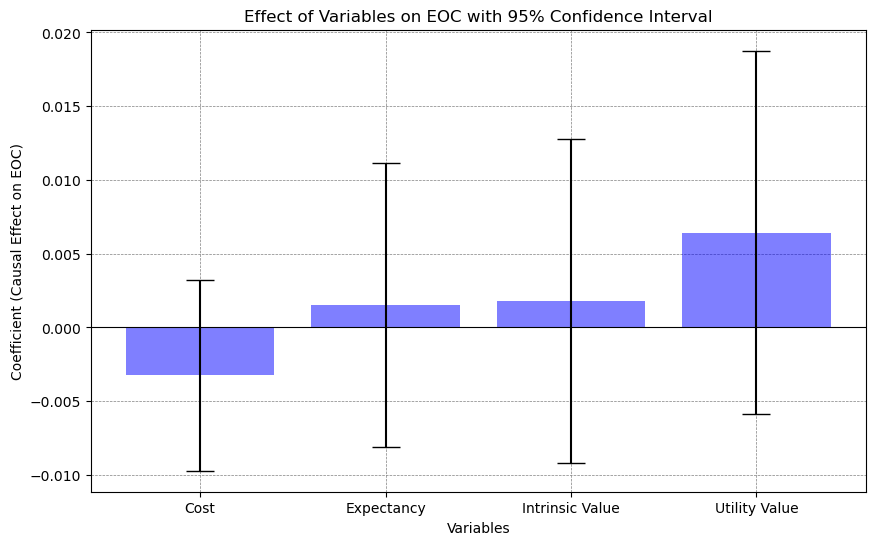

In [84]:
# Extracting the regression coefficients and confidence intervals
coefficients = results_cleaned.params[['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']]
confidence_intervals = results_cleaned.conf_int().loc[['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']]
errors = coefficients - confidence_intervals[0]

# Setting up the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(coefficients.index, coefficients, yerr=errors.values.T, alpha=0.5, color='blue', capsize=10)

# Adding labels and title
plt.xlabel('Variables')
plt.ylabel('Coefficient (Causal Effect on EOC)')
plt.title('Effect of Variables on EOC with 95% Confidence Interval')

# Enhancing the plot aesthetics
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at zero for reference
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().set_axisbelow(True)

# Displaying the plot
plt.show()
